## RL env example

Ref: Deep RL Hands-on

In [3]:
import random

class Environment:
    def __init__(self):
        self.steps_left = 10

    def get_observation(self):
        return [0.0, 0.0, 0.0]

    def get_actions(self):
        return [0, 1]

    def is_done(self):
        return self.steps_left == 0

    def action(self, action):
        if self.is_done():
            raise Exception("Game is over")
        self.steps_left -= 1
        return random.random()


class Agent:
    def __init__(self):
        self.total_reward = 0.0

    def step(self, env):
        current_obs = env.get_observation()
        actions = env.get_actions()
        reward = env.action(random.choice(actions))
        self.total_reward += reward

env1 = Environment()
agent = Agent()

while not env1.is_done():
    agent.step(env1)

print("Total reward got: %.4f" % agent.total_reward)

Total reward got: 4.5963


## Gym env example

Episode done in 12 steps, total reward 12.00


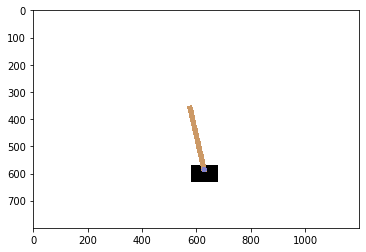

In [6]:
import gym

from IPython.display import clear_output, display
import matplotlib.pyplot as plt
#%matplotlib inline

env2 = gym.make("CartPole-v0")

total_reward = 0.0
total_steps = 0

obs = env2.reset()
while True:
    action = env2.action_space.sample()
    obs, reward, done, _ = env2.step(action)
    
    env2.render()
# some correction if env2.render() does not work   
#     plt.imshow(env2.render(mode='rgb_array'))
#     display(plt.gcf())
#     clear_output(wait=True)
            
    total_reward += reward
    total_steps += 1
    if done:
        break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

env2.close() # close it

## Gym wrapper example

In [9]:
import gym

import random

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action):
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample()
        return action



env3 = RandomActionWrapper(gym.make("CartPole-v0"))

obs = env3.reset()
total_reward = 0.0

while True:
    obs, reward, done, _ = env3.step(0)
    total_reward += reward
    if done:
        break

print("Reward got: %.2f" % total_reward)

env3.close()

Random!
Random!
Reward got: 9.00


## Recording

In [10]:
import os
import gym

if os.path.exists("./recording"):
    os.system("rm -rf ./recording")

env4 = gym.make("CartPole-v0")
env4 = gym.wrappers.Monitor(env4, "recording")

total_reward = 0.0
total_steps = 0
obs = env4.reset()

while True:
    action = env4.action_space.sample()
    obs, reward, done, _ = env4.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        break

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

env4.close()
env4.env.close()

Episode done in 12 steps, total reward 12.00
